**Missing_values**


- `Mean | Median | Mode`
- `Constant technique `
- `End_of_Distribution `
- `Arbitary value technique `
- `Random Sample Imputation`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Titanic-Dataset.csv',usecols = ['Age'])
df

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


In [3]:
df['Age'].isnull().sum()

np.int64(177)

In [9]:
df['Age'].mode()[0]

np.float64(24.0)

In [10]:
df['Age_mean'] = df['Age'].fillna(df['Age'].mean())
df['Age_median'] = df['Age'].fillna(df['Age'].median())
df['Age_mode'] = df['Age'].fillna(df['Age'].mode()[0])

In [11]:
df.sample(10)

,Age,Age_mean,Age_median,Age_mode
216,27.00,27.000000,27.00,27.00
78,0.83,0.830000,0.83,0.83
431,NaN,29.699118,28.00,24.00
501,21.00,21.000000,21.00,21.00
661,40.00,40.000000,40.00,40.00
451,NaN,29.699118,28.00,24.00
794,25.00,25.000000,25.00,25.00
889,26.00,26.000000,26.00,26.00
176,NaN,29.699118,28.00,24.00
515,47.00,47.000000,47.00,47.00


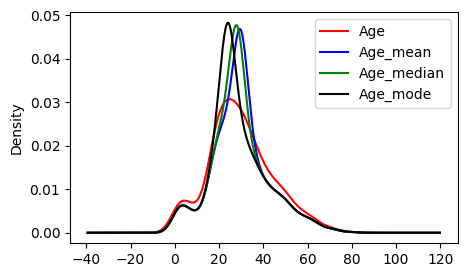

In [13]:
plt.figure(figsize = (5,3))

df['Age'].plot(kind = 'kde',color = 'r',label = 'Age')
df['Age_mean'].plot(kind = 'kde',color = 'blue',label = 'Age_mean')
df['Age_median'].plot(kind = 'kde',color = 'green',label = 'Age_median')
df['Age_mode'].plot(kind = 'kde',color = 'black',label = 'Age_mode')

plt.legend()
plt.show()

In [14]:
print(f'Age Std : {df["Age"].std()}')
print(f'Age_mean Std : {df["Age_mean"].std()}')
print(f'Age_median Std : {df["Age_median"].std()}')
print(f'Age_mode Std : {df["Age_mode"].std()}')

Age Std : 14.526497332334044
Age_mean Std : 13.002015226002884
Age_median Std : 13.019696550973194
Age_mode Std : 13.199571767746487


In [15]:
# constant | End of Distribution | Arbitary Value

# constant
df['Age_constant'] = np.where(df['Age'].isnull(),0,1)

# end of distribution
value = df['Age'].mean() + 3 * df['Age'].std()
df['Age_EOD'] = df['Age'].fillna(value)

# Arbitary
df['Age_arbitary'] = df['Age'].fillna(999)

In [16]:
df.sample(10)

,Age,Age_mean,Age_median,Age_mode,Age_constant,Age_EOD,Age_arbitary
46,NaN,29.699118,28.0,24.0,0,73.27861,999.0
603,44.0,44.000000,44.0,44.0,1,44.00000,44.0
161,40.0,40.000000,40.0,40.0,1,40.00000,40.0
429,32.0,32.000000,32.0,32.0,1,32.00000,32.0
640,20.0,20.000000,20.0,20.0,1,20.00000,20.0
307,17.0,17.000000,17.0,17.0,1,17.00000,17.0
158,NaN,29.699118,28.0,24.0,0,73.27861,999.0
62,45.0,45.000000,45.0,45.0,1,45.00000,45.0
185,NaN,29.699118,28.0,24.0,0,73.27861,999.0
648,NaN,29.699118,28.0,24.0,0,73.27861,999.0


In [17]:
print(f'Age Std : {df["Age"].std()}')
print(f'Age_constant Std : {df["Age_constant"].std()}')
print(f'Age_EOD Std : {df["Age_EOD"].std()}')
print(f'Age_Arbitary Std : {df["Age_arbitary"].std()}')

Age Std : 14.526497332334044
Age_constant Std : 0.3992104339880471
Age_EOD Std : 21.719150677136366
Age_Arbitary Std : 387.17340362718875


In [50]:
f = pd.DataFrame({'Price':[120,140,np.nan,30,70,np.nan,50]})
f

,Price
0,120.0
1,140.0
2,NaN
3,30.0
4,70.0
5,NaN
6,50.0


In [51]:
s = f.dropna().sample(f['Price'].isnull().sum())
s

,Price
0,120.0
1,140.0


In [52]:
s.index

Index([0, 1], dtype='int64')

In [53]:
f[f['Price'].isnull()].index

Index([2, 5], dtype='int64')

In [54]:
s.index = f[f['Price'].isnull()].index

In [55]:
s.index

Index([2, 5], dtype='int64')

In [56]:
s

,Price
2,120.0
5,140.0


In [45]:
f['Price_replaced'] = f['Price'].copy()

In [46]:
f

,Price,Price_replaced
0,120.0,120.0
1,140.0,140.0
2,NaN,NaN
3,30.0,30.0
4,70.0,70.0
5,NaN,NaN
6,50.0,50.0


In [47]:
f.loc[f['Price'].isnull() , 'Price_replaced'] = s

In [48]:
f

,Price,Price_replaced
0,120.0,120.0
1,140.0,140.0
2,NaN,NaN
3,30.0,30.0
4,70.0,70.0
5,NaN,NaN
6,50.0,50.0


In [58]:
def fun(f,var):
  f[var+'_replaced'] = f[var].copy()
  s = f[var].dropna().sample(f[var].isnull().sum())
  s.index = f[f[var].isnull()].index
  f.loc[f['Price'].isnull() , 'Price_replaced'] = s


fun(f,'Price')

In [59]:
f

,Price,Price_replaced
0,120.0,120.0
1,140.0,140.0
2,NaN,120.0
3,30.0,30.0
4,70.0,70.0
5,NaN,50.0
6,50.0,50.0


In [61]:
def fun(df,var):
  df[var+'_replaced'] = df[var].copy()
  s = df[var].dropna().sample(df[var].isnull().sum())
  s.index = df[df[var].isnull()].index
  df.loc[df['Age'].isnull() , 'Age_replaced'] = s


fun(df,'Age')

In [63]:
df.sample(10)

,Age,Age_mean,Age_median,Age_mode,Age_constant,Age_EOD,Age_arbitary,Age_replaced
706,45.0,45.000000,45.0,45.0,1,45.00000,45.0,45.0
326,61.0,61.000000,61.0,61.0,1,61.00000,61.0,61.0
70,32.0,32.000000,32.0,32.0,1,32.00000,32.0,32.0
75,25.0,25.000000,25.0,25.0,1,25.00000,25.0,25.0
483,63.0,63.000000,63.0,63.0,1,63.00000,63.0,63.0
759,33.0,33.000000,33.0,33.0,1,33.00000,33.0,33.0
512,36.0,36.000000,36.0,36.0,1,36.00000,36.0,36.0
46,NaN,29.699118,28.0,24.0,0,73.27861,999.0,29.0
699,42.0,42.000000,42.0,42.0,1,42.00000,42.0,42.0
258,35.0,35.000000,35.0,35.0,1,35.00000,35.0,35.0


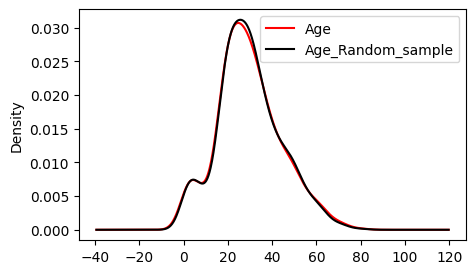

In [64]:
plt.figure(figsize = (5,3))

df['Age'].plot(kind = 'kde',color = 'r',label = 'Age')
df['Age_replaced'].plot(kind = 'kde',color = 'black',label = 'Age_Random_sample')

plt.legend()
plt.show()

In [65]:
print(f'Age Std : {df["Age"].std()}')
print(f'Age_Random_Sample Std : {df["Age_replaced"].std()}')


Age Std : 14.526497332334044
Age_Random_Sample Std : 14.263787273271493
